In [1]:
import numpy as np
import pandas as pd

In [83]:
tracks_features = pd.read_pickle('src/tracks_numerical_features.pkl')
tracks_features.set_index('id', inplace=True)
tracks_features = tracks_features[tracks_features['time_signature'] != 0] # filters invalid songs
tracks_features.head()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,
7lmeHLHBe4nmXzuXc0HDjk,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0
1wsRitfRRtWyEapl0q22o8,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0
1hR0fIFK2qRG3f3RF70pb7,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0
2lbASgTSoDO7MTuLAXlTW0,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0
1MQTmpYOZ6fcMQc56Hdo7T,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0


In [49]:

print('---LinReg with all features---')
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import trange, tqdm

# for i in trange(4): #first loop
#     for j in tqdm(range(100)): #Nested loop

kf = KFold(n_splits=10, shuffle=True, random_state=0)

X = tracks_features.drop(['danceability'], axis=1).values
y = tracks_features['danceability'].values
# for i in trange(len(kf)):

errors = []
splitted = kf.split(X)
counter = 0
for train_idx, test_idx in kf.split(X):
    print('- iteration ', counter, ': ')
    X_train, X_test = X[list(train_idx)], X[list(test_idx)]
    y_train, y_test = y[list(train_idx)], y[list(test_idx)]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    errors.append(err)
    print('curr error: ', err)
    counter += 1

print('avg error: ', np.average(np.array(errors)))

---LinReg with all features---
- iteration  0 : 
curr error:  0.02016812983287394
- iteration  1 : 
curr error:  0.0201149519064499
- iteration  2 : 
curr error:  0.020154064405346443
- iteration  3 : 
curr error:  0.020153590684435504
- iteration  4 : 
curr error:  0.02018092877955619
- iteration  5 : 
curr error:  0.02009660402602626
- iteration  6 : 
curr error:  0.020188325087163658
- iteration  7 : 
curr error:  0.020087798243694565
- iteration  8 : 
curr error:  0.020087581243208988
- iteration  9 : 
curr error:  0.02008095386040404
avg error:  0.020131292806915946


---LinReg with PCA---
explained variance ratio:  [0.28410222 0.2422288 ]
pca components:  [[-0.13617451 -0.49763796 -0.05220227 -0.16243218  0.1261145  -0.04334467
   0.6667124   0.40564509 -0.06850669 -0.25551417 -0.07125632 -0.05299584]
 [ 0.01444705 -0.04045242  0.17781381 -0.02395137 -0.96737729  0.00498578
   0.04090347  0.14935752 -0.01683791 -0.07508756 -0.01393089 -0.00482631]]
chosen features: acousticness, energy
- iteration  0 : 
(32, 32)
(32, 32)
[-0.0836837   0.09219563]
0.4846134706095249


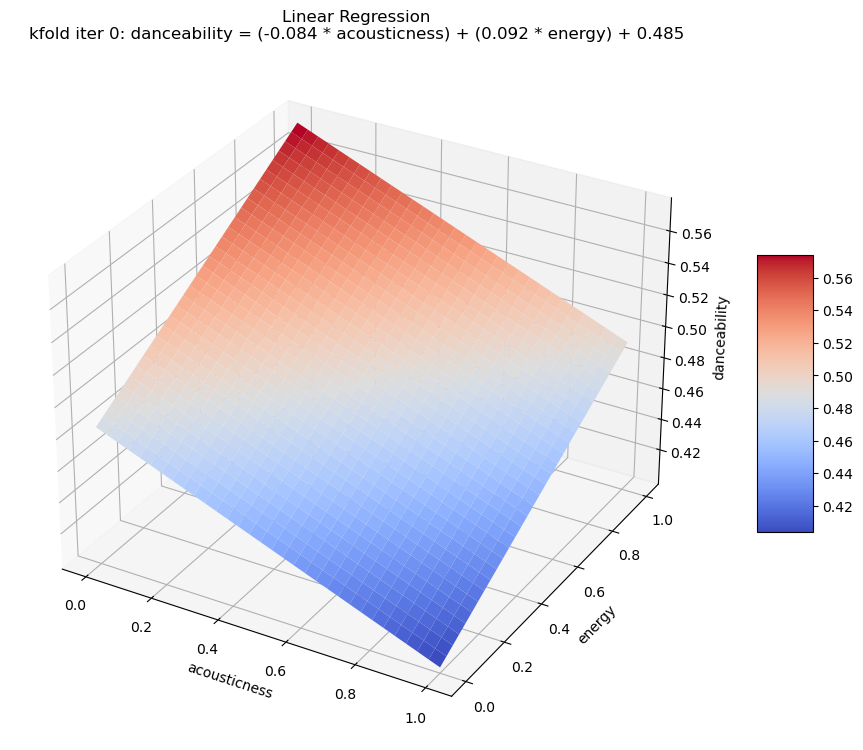

curr error:  0.032381080119235905
- iteration  1 : 
(32, 32)
(32, 32)
[-0.08412342  0.09197938]
0.4850077467275515


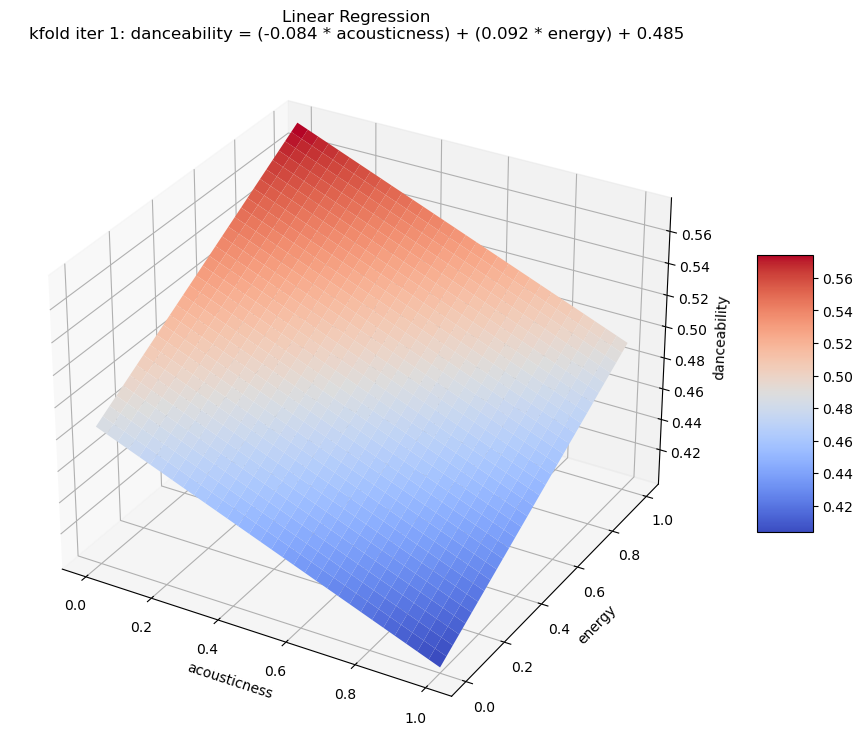

curr error:  0.03213972826203388
- iteration  2 : 
(32, 32)
(32, 32)
[-0.08359735  0.09238201]
0.4845298267570667


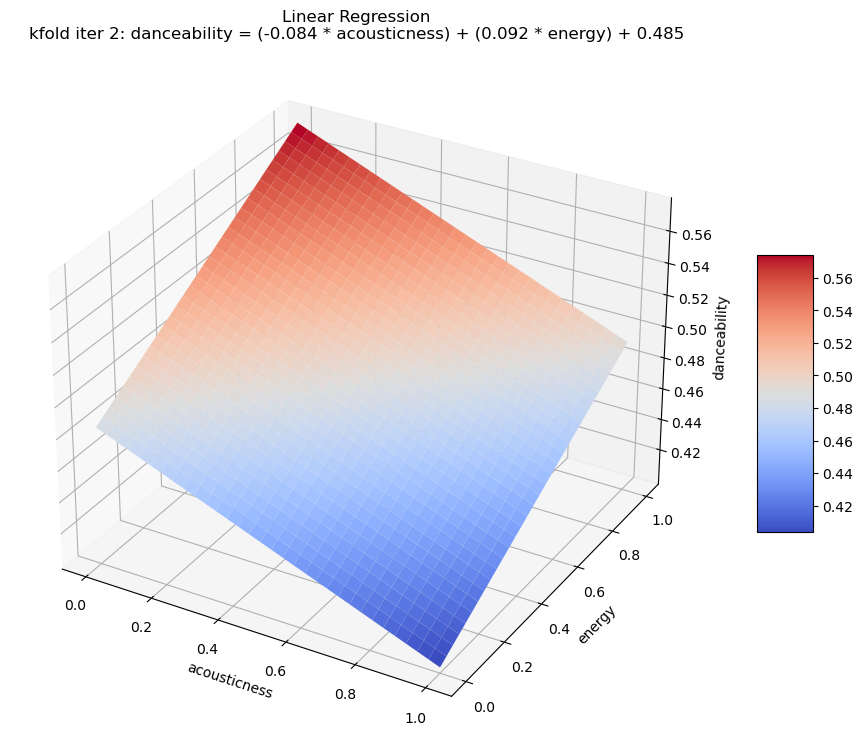

curr error:  0.032346177775870046
- iteration  3 : 
(32, 32)
(32, 32)
[-0.08378122  0.09219376]
0.48477733028196024


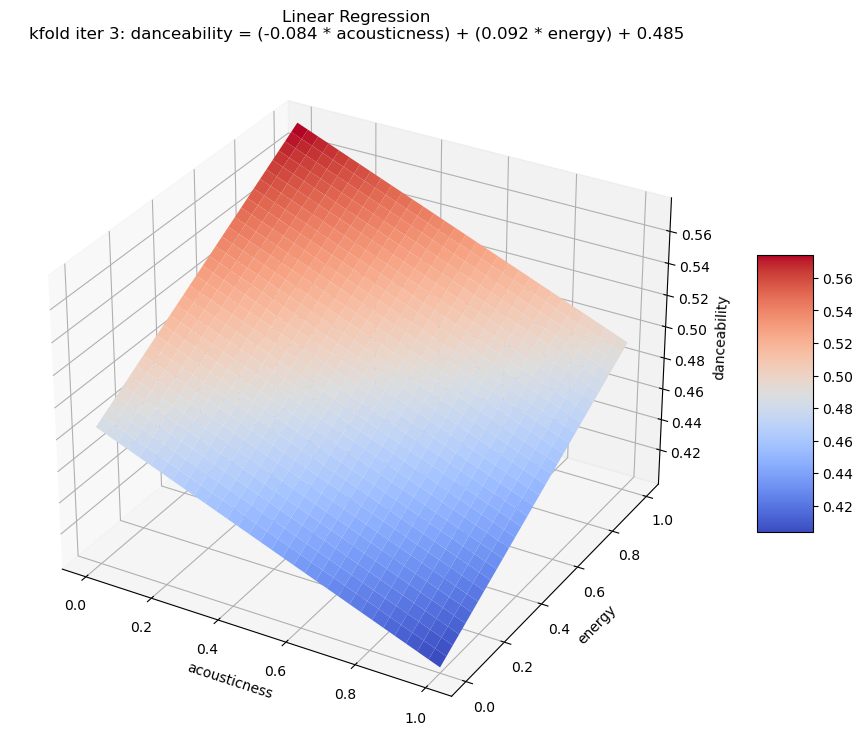

curr error:  0.03227456334338526
- iteration  4 : 
(32, 32)
(32, 32)
[-0.0846123   0.09120675]
0.48559660129394505


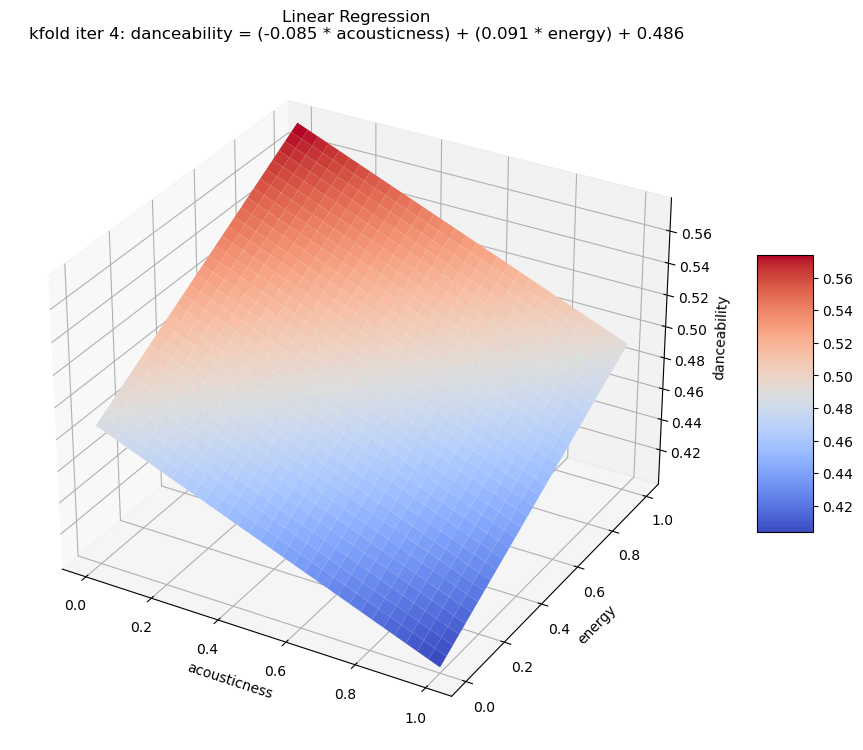

curr error:  0.03235720663854335
- iteration  5 : 
(32, 32)
(32, 32)
[-0.08346537  0.09244247]
0.4844768857033995


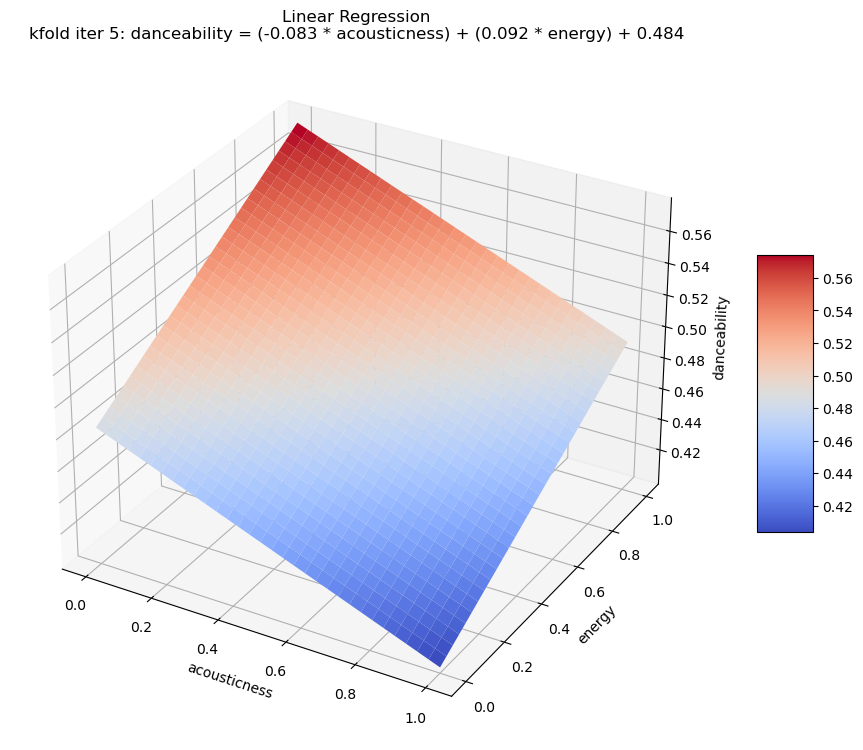

curr error:  0.032297549794094486
- iteration  6 : 
(32, 32)
(32, 32)
[-0.08388439  0.09193553]
0.4849795867665013


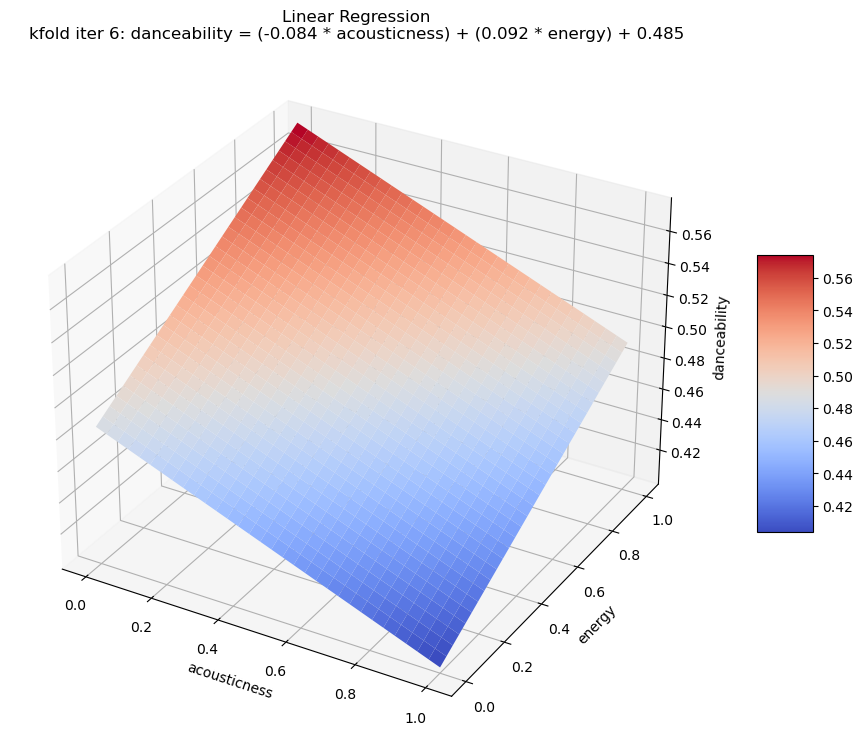

curr error:  0.032419764255432734
- iteration  7 : 
(32, 32)
(32, 32)
[-0.08403045  0.09180251]
0.48505575134381


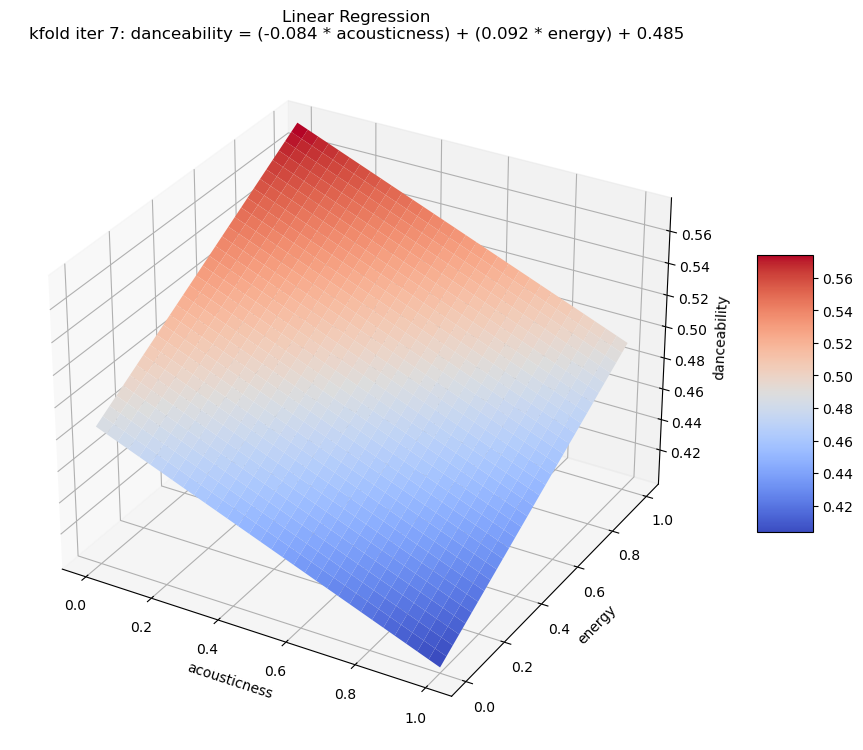

curr error:  0.03227739248862252
- iteration  8 : 
(32, 32)
(32, 32)
[-0.08380118  0.09202435]
0.4848115958192889


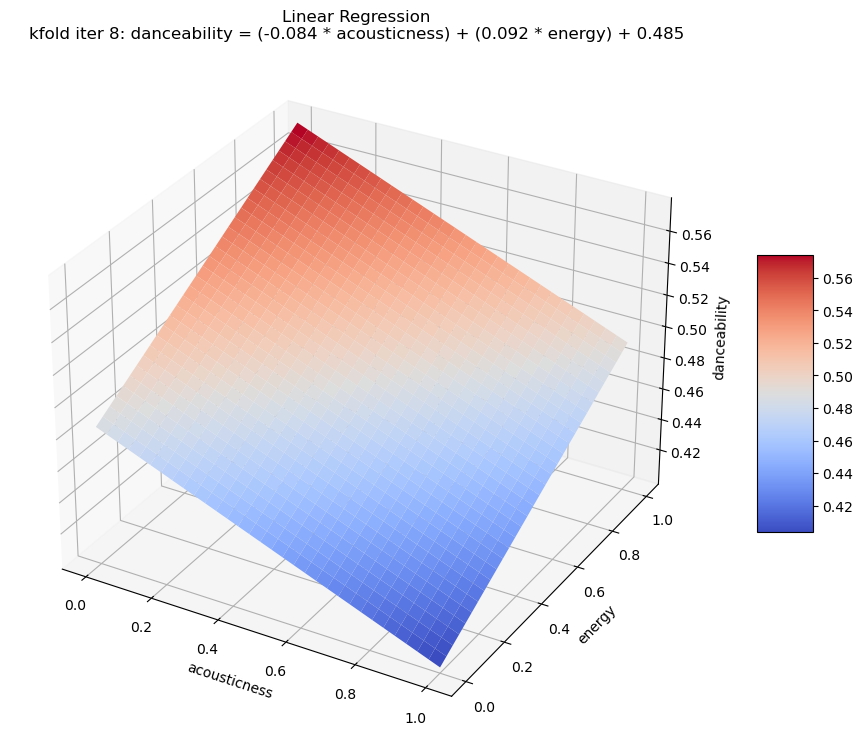

curr error:  0.03226059987352662
- iteration  9 : 
(32, 32)
(32, 32)
[-0.08402759  0.09169989]
0.48513677918777875


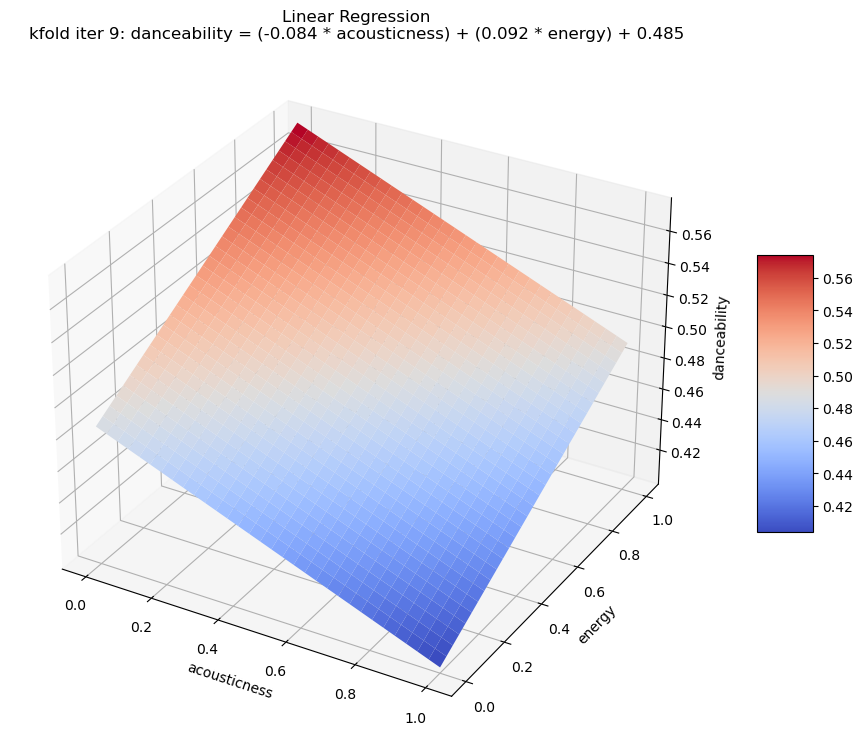

curr error:  0.032296256160823086
avg error:  0.03230503187115679


In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
print('---LinReg with PCA---')
# PCA'ed features
def absmax_scale(series):
    return (series - min(series)) / (series.max() - series.min())
for col in tracks_features.columns:
    tracks_features[col] = absmax_scale(tracks_features[col])
    tracks_features[col] = np.round(tracks_features[col],4)

# rounding stuff
X = tracks_features.drop('danceability', axis=1).values
y = tracks_features['danceability'].values
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

print('explained variance ratio: ', pca.explained_variance_ratio_)
print('pca components: ', pca.components_)

print('chosen features: acousticness, energy')

# selecting the features with most variance given by pca
X = tracks_features[['acousticness', 'energy']].values
y = tracks_features['danceability'].values
from sklearn.linear_model import LinearRegression

errors = []
splitted = kf.split(X)
counter = 0
for train_idx, test_idx in kf.split(X):
    print('- iteration ', counter, ': ')

    X_train, X_test = X[list(train_idx)], X[list(test_idx)]
    y_train, y_test = y[list(train_idx)], y[list(test_idx)]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Creating dataset
    xx = np.outer(np.linspace(0, 1, 32), np.ones(32))
    yy = xx.copy().T 
    zz = (lin_reg.coef_[0] * xx) + (lin_reg.coef_[1] * yy) + lin_reg.intercept_

    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d',xlabel='acousticness',ylabel='energy', zlabel='danceability')
    
    
    # Creating plot
    tmp = ax.plot_surface(xx, yy, zz,cmap=cm.coolwarm)
    ax.set_title('Linear Regression\nkfold iter %s: danceability = (%s * acousticness) + (%s * energy) + %s'%(counter, np.round(lin_reg.coef_[0],3), np.round(lin_reg.coef_[1],3), np.round(lin_reg.intercept_,3)))
    print(lin_reg.coef_)
    print(lin_reg.intercept_)
    fig.colorbar(tmp, ax = ax, shrink = 0.4, aspect = 5)

    plt.show();
    err = mean_squared_error(y_test, y_pred)
    errors.append(err)
    print('curr error: ', err)
    counter += 1

print('avg error: ', np.average(np.array(errors)))

In [ ]:
print('---Random uniform guess---')
y = tracks_features['danceability'].values
errors = []
splitted = kf.split(X)

counter = 0
for train_idx, test_idx in kf.split(X):
    print('- iteration ', counter, ': ')
    y_test = y[list(test_idx)]
    err = mean_squared_error(y_test, np.random.rand(y_test.shape[0]))
    errors.append(err)
    print('curr error: ', err)
    counter += 1

print('avg error: ', np.average(np.array(errors)))

---Random uniform guess---
- iteration  0 : 
curr error:  0.11825997631862785
- iteration  1 : 
curr error:  0.11842103762682016
- iteration  2 : 
curr error:  0.11979113320401405
- iteration  3 : 
curr error:  0.11876825432728685
- iteration  4 : 
curr error:  0.11938714950876275
- iteration  5 : 
curr error:  0.11950630994068982
- iteration  6 : 
curr error:  0.11887634471210622
- iteration  7 : 
curr error:  0.11839881437834249
- iteration  8 : 
curr error:  0.11960689228523415
- iteration  9 : 
curr error:  0.11855592630138488
avg error:  0.11895718386032691
